exe 1 :

In [16]:
temp = "this is a test string"
def longest_unique_substring(temp):
    start = 0
    max_len = 0
    seen = {}
    for i in range(len(temp)):
        if temp[i] in seen and seen[temp[i]] >= start:
            start = seen[temp[i]] + 1
        seen[temp[i]] = i
        max_len = max(max_len, i - start + 1)
    return max_len


exe 2:

In [19]:
print(longest_unique_substring(temp))
print(longest_unique_substring("pwwkew"))


7
3


In [1]:
import pandas as pd
top = pd.read_csv('imdb_top_1000.csv')
print(top.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [44]:
score=top[['IMDB_Rating','Series_Title' ,'Star1','Star2','Star3','Star4']]
print(score)

     IMDB_Rating              Series_Title              Star1  \
0            9.3  The Shawshank Redemption        Tim Robbins   
1            9.2             The Godfather      Marlon Brando   
2            9.0           The Dark Knight     Christian Bale   
3            9.0    The Godfather: Part II          Al Pacino   
4            9.0              12 Angry Men        Henry Fonda   
..           ...                       ...                ...   
995          7.6    Breakfast at Tiffany's     Audrey Hepburn   
996          7.6                     Giant   Elizabeth Taylor   
997          7.6     From Here to Eternity     Burt Lancaster   
998          7.6                  Lifeboat  Tallulah Bankhead   
999          7.6              The 39 Steps       Robert Donat   

                 Star2           Star3           Star4  
0       Morgan Freeman      Bob Gunton  William Sadler  
1            Al Pacino      James Caan    Diane Keaton  
2         Heath Ledger   Aaron Eckhart   Michael

In [45]:
ABV_80=top[(top['IMDB_Rating']>9) & (top['Meta_score']>80)]
print(ABV_80)

                                         Poster_Link   Series_Title  \
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...  The Godfather   

  Released_Year Certificate  Runtime         Genre  IMDB_Rating  \
1          1972           A      175  Crime, Drama          9.2   

                                            Overview  Meta_score  \
1  An organized crime dynasty's aging patriarch t...       100.0   

               Director          Star1      Star2       Star3         Star4  \
1  Francis Ford Coppola  Marlon Brando  Al Pacino  James Caan  Diane Keaton   

   No_of_Votes        Gross  
1      1620367  134,966,411  


In [52]:
top['Runtime'] = top['Runtime'].astype(str).str.replace(' min', '').astype(float)
ABV_Duration_170 = top[top['Runtime'] > 170][['Series_Title', 'Runtime', 'Genre']]
print(ABV_Duration_170)
ABV_Duration_170.head()

                                          Series_Title  Runtime  \
1                                        The Godfather    175.0   
3                               The Godfather: Part II    202.0   
5        The Lord of the Rings: The Return of the King    201.0   
7                                     Schindler's List    195.0   
10   The Lord of the Rings: The Fellowship of the Ring    178.0   
13               The Lord of the Rings: The Two Towers    179.0   
25                                      The Green Mile    189.0   
31                                Shichinin no samurai    207.0   
59                                   Avengers: Endgame    181.0   
71                         Once Upon a Time in America    229.0   
102                                         Braveheart    178.0   
116                                 Lawrence of Arabia    228.0   
139                                 Bhaag Milkha Bhaag    186.0   
140                                 Gangs of Wasseypur    321.

,Series_Title,Runtime,Genre
1,The Godfather,175.0,"Crime, Drama"
3,The Godfather: Part II,202.0,"Crime, Drama"
5,The Lord of the Rings: The Return of the King,201.0,"Action, Adventure, Drama"
7,Schindler's List,195.0,"Biography, Drama, History"
10,The Lord of the Rings: The Fellowship of the Ring,178.0,"Action, Adventure, Drama"


In [61]:
top['Gross'] = top['Gross'].astype(str).str.replace(',', '').astype(float)
top['No_of_Votes'] = top['No_of_Votes'].astype(str).str.replace(',', '').astype(float)

sub_4 = top[(top['Gross'] > 150000000) &(top['No_of_Votes'] > 1660000) &(top['Genre'].str.contains('Drama', na=False))][['Director', 'Series_Title', 'IMDB_Rating']]
print(sub_4)
sub_4.head()


             Director                                       Series_Title  \
2   Christopher Nolan                                    The Dark Knight   
10      Peter Jackson  The Lord of the Rings: The Fellowship of the Ring   
11    Robert Zemeckis                                       Forrest Gump   

    IMDB_Rating  
2           9.0  
10          8.8  
11          8.8  


,Director,Series_Title,IMDB_Rating
2,Christopher Nolan,The Dark Knight,9.0
10,Peter Jackson,The Lord of the Rings: The Fellowship of the Ring,8.8
11,Robert Zemeckis,Forrest Gump,8.8


In [8]:
avg_rtng_rels_year = top.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
print(avg_rtng_rels_year)


   Released_Year  IMDB_Rating
0           1920     8.100000
1           1921     8.300000
2           1922     7.900000
3           1924     8.200000
4           1925     8.100000
..           ...          ...
95          2017     7.890909
96          2018     7.994737
97          2019     7.995652
98          2020     8.133333
99            PG     7.600000

[100 rows x 2 columns]


In [13]:
top['Gross'] = pd.to_numeric(top['Gross'].astype(str).str.replace(',', ''), errors='coerce')

max_gross = top.groupby('Certificate')['Gross'].max().reset_index()

print(max_gross)


   Certificate        Gross
0           16          NaN
1            A  335451311.0
2     Approved   23650000.0
3            G  218967620.0
4           GP    1378435.0
5           PG  102308889.0
6        PG-13  209028679.0
7       Passed   30500000.0
8            R  363070709.0
9        TV-14          NaN
10       TV-MA          NaN
11       TV-PG     106662.0
12           U  936662225.0
13         U/A   26020957.0
14          UA  858373000.0
15     Unrated     300000.0


In [14]:
movies_per_year = top['Released_Year'].value_counts().sort_index()
print(movies_per_year)


Released_Year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2017    22
2018    19
2019    23
2020     6
PG       1
Name: count, Length: 100, dtype: int64


3rd. section :


In [19]:
top.rename(columns={'Gross': 'Gross_income'}, inplace=True)
top

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_income,Gross_income
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN


In [20]:
top.drop(columns=['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview'], inplace=True)
top.head()

,Poster_Link,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross_income,Gross_income
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,4360000.0


In [27]:
top['Runtime'] = top['Runtime'].astype(str).str.replace(' min', '').astype(int)
top.head()


,Poster_Link,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross_income,Gross_income
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,4360000.0


In [28]:
top['Genre'] = top['Genre'].astype(str).str.split(',').str[0]
top.head()

,Poster_Link,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross_income,Gross_income
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1972,A,175,Crime,9.2,100.0,Francis Ford Coppola,1620367,134966411.0,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2008,UA,152,Action,9.0,84.0,Christopher Nolan,2303232,534858444.0,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1974,A,202,Crime,9.0,90.0,Francis Ford Coppola,1129952,57300000.0,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1957,U,96,Crime,9.0,96.0,Sidney Lumet,689845,4360000.0,4360000.0


In [2]:
print(top.isnull().sum())

top['Gross'] = pd.to_numeric(top['Gross'].astype(str).str.replace(',', ''), errors='coerce')
top['Gross'].fillna(top['Gross'].mean(), inplace=True)

top['Runtime'] = pd.to_numeric(top['Runtime'].astype(str).str.replace(' min', ''), errors='coerce')
top['Runtime'].fillna(top['Runtime'].median(), inplace=True)

top['Certificate'].fillna(top['Certificate'].mode()[0], inplace=True)

top.head()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


C:\Users\Yuval\AppData\Local\Temp\ipykernel_17032\1959113329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top['Gross'].fillna(top['Gross'].mean(), inplace=True)
C:\Users\Yuval\AppData\Local\Temp\ipykernel_17032\1959113329.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [6]:
print("number of duplications", top.duplicated().sum())

top.drop_duplicates(inplace=True)

print("post manipulatin:", top.shape)


number of duplications 0
post manipulatin: (1000, 16)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = top.select_dtypes(include='number').columns
top[numeric_cols] = scaler.fit_transform(top[numeric_cols])
top.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,0.351449,Drama,1.000000,Two imprisoned men bond over a number of years...,0.722222,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,1.000000,0.030257
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,0.471014,"Crime, Drama",0.941176,An organized crime dynasty's aging patriarch t...,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,0.688207,0.144092
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,0.387681,"Action, Crime, Drama",0.823529,When the menace known as the Joker wreaks havo...,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,0.982797,0.571025
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,0.568841,"Crime, Drama",0.823529,The early life and career of Vito Corleone in ...,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,0.476641,0.061173
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,0.184783,"Crime, Drama",0.823529,A jury holdout attempts to prevent a miscarria...,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,0.286778,0.004653


In [12]:
top = pd.get_dummies(top, columns=['Certificate', 'Genre'], drop_first=True)
print(top)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year   Runtime  IMDB_Rating  \
0    The Shawshank Redemption          1994  0.351449     1.000000   
1               The Godfather          1972  0.471014     0.941176   
2             The Dark Knight          2008  0.387681     0.823529   
3      The Godfather: P

4th section 

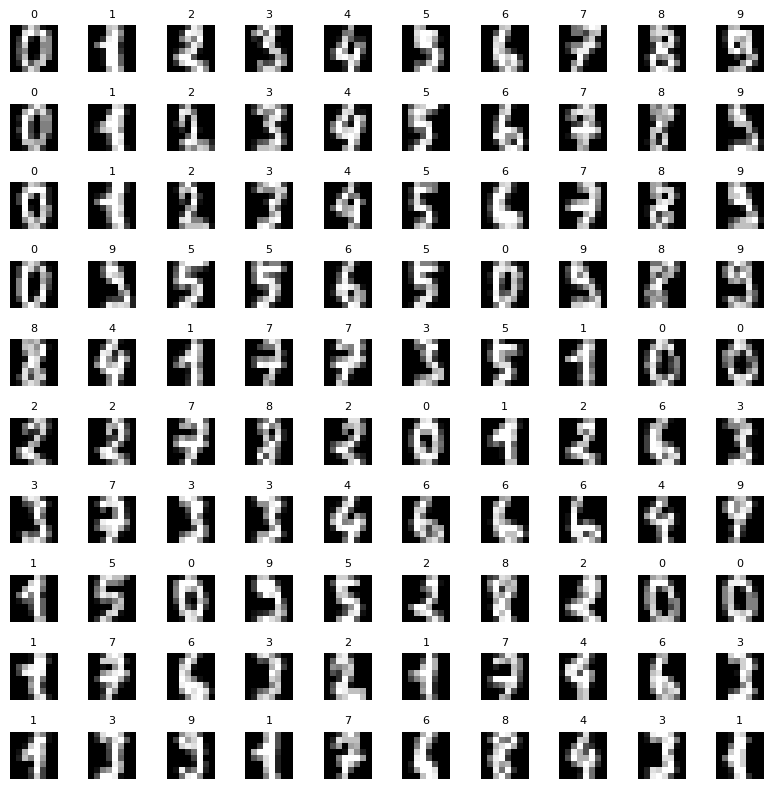

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'{digits.target[i]}', fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("Mean of X_train:", X_train.mean())
print("Standard deviation of X_train:", X_train.std())


Mean of X_train: 4.890601800296956
Standard deviation of X_train: 6.024675566597012


TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
print("Mean of X_test:", X_test.mean())
print("Standard deviation of X_test:", X_test.std())


Mean of X_test: -0.0077101146427270605
Standard deviation of X_test: 0.9280196047375799


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.9866666666666667


In [8]:
import numpy as np

# טבלת כמויות גשם לפי ימים בחודש
rain_data = np.array([
    [10, 40,  3,  2, 0, 0, 3, 2, 0, 0],
    [ 0,  1, 20, 14, 0, 0, 0, 0, 0, 2],
    [ 0,  2, 20, 12,10, 0, 0, 0,25, 3]
])

# א. סטטיסטיקה עבור כל החודש (כל הערכים)
mean_all = np.mean(rain_data)
var_all = np.var(rain_data)
std_all = np.std(rain_data)

print("ממוצע כללי:", mean_all)
print("שונות כללית:", var_all)
print("סטיית תקן כללית:", std_all)

# ב. רק הימים שירד בהם גשם (> 0)
rain_only = rain_data[rain_data > 0]
mean_rain = np.mean(rain_only)
var_rain = np.var(rain_only)
std_rain = np.std(rain_only)

print("\nממוצע רק לימים שירד גשם:", mean_rain)
print("שונות רק לימים שירד גשם:", var_rain)
print("סטיית תקן רק לימים שירד גשם:", std_rain)


ממוצע כללי: 5.633333333333334
שונות כללית: 88.56555555555556
סטיית תקן כללית: 9.410927454589986

ממוצע רק לימים שירד גשם: 10.5625
שונות רק לימים שירד גשם: 113.99609375
סטיית תקן רק לימים שירד גשם: 10.676895323547946
